<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/main/ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.1 MB/s eta 0:00:00


In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [3]:
femaleBirth=pd.read_csv('/content/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
femaleBirth.index.freq='D'
femaleBirth=femaleBirth[:120]

In [4]:
tradeInv=pd.read_csv('/content/TradeInventories.csv',index_col='Date',parse_dates=True)
tradeInv.index.freq='MS'
tradeInv

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294
...,...
2018-08-01,2127170
2018-09-01,2134172
2018-10-01,2144639


In [5]:
# ARIMA

<Axes: xlabel='Date'>

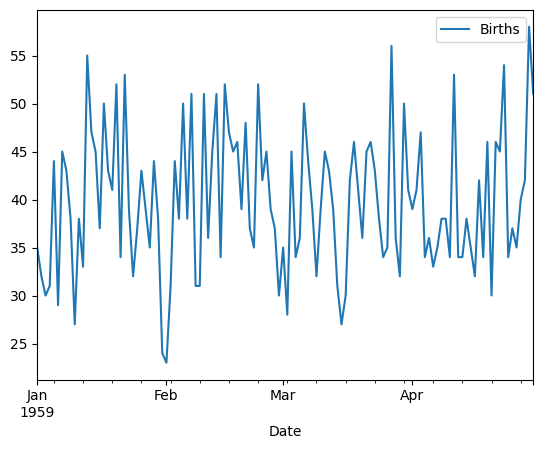

In [6]:
femaleBirth.plot()

In [7]:
auto_arima(femaleBirth['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Wed, 17 Jul 2024   AIC                            823.489
Time:                        18:16:29   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
train=femaleBirth.iloc[:90]
test=femaleBirth.iloc[90:]

In [9]:
results=ARIMA(train['Births'],order=(2,0,2)).fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -307.812
Date:                Wed, 17 Jul 2024   AIC                            627.625
Time:                        18:16:30   BIC                            642.624
Sample:                    01-01-1959   HQIC                           633.673
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7571      1.017     39.091      0.000      37.764      41.750
ar.L1         -0.4654      1.003     -0.464      0.643      -2.431       1.501
ar.L2          0.5086      0.940      0.541      0.589      -1.334       2.351
ma.L1          0.5613     11.784      0.048      0.962     -22.535      23.657
ma.L2         -0.4385      5.086     -0.086      0.931     -10.407       9.530
sigma2        54.3790    623.600      0.087      0.931   -1167.855    1276.613
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.96   Prob(JB):                         0.37
Heteroskedasticity (H):               0.92   Skew:                             0.16
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
start=len(train)
end=len(train)+len(test)-1
predctions=results.predict(start=start,end=end).rename('ARIMA(2,0,2)')

<Axes: xlabel='Date'>

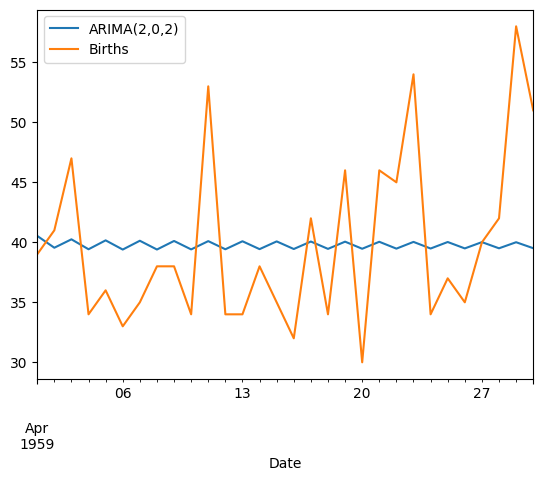

In [12]:
predctions.plot(legend=True)
test['Births'].plot(legend=True)

In [13]:
test.mean()

Births    39.833333
dtype: float64

In [14]:
predctions.mean()

39.785507935774895

<Axes: xlabel='Date'>

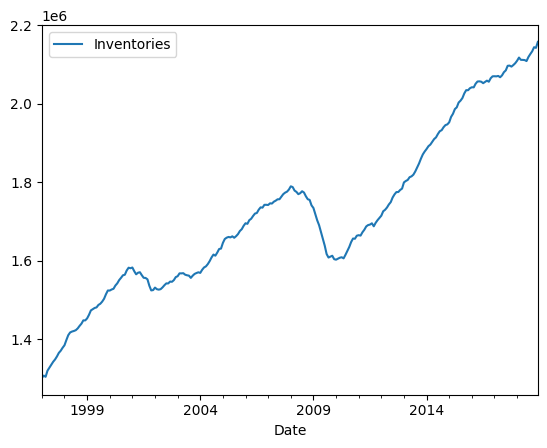

In [15]:
tradeInv.plot()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

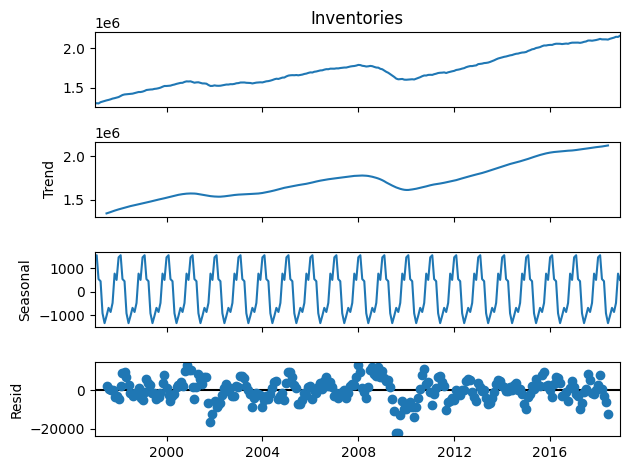

In [19]:
results=seasonal_decompose(tradeInv['Inventories'],model='additive')
results.plot();

In [18]:
auto_arima(tradeInv['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Wed, 17 Jul 2024   AIC                           5348.037
Time:                        18:16:41   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
from statsmodels.tsa.statespace.tools import diff

In [21]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [31]:
df['diff']=diff(tradeInv['Inventories'],k_diff=1)


In [35]:
adf_test(df['diff'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
